# Assignment 6 - Nicholas Petr 

### 1 - Write a Julia code for  f(x)  and  Df(x) . Run the Newthon-Raphson method and search for the solution. Prepare a table with values for  x ,  f(x) ,  Df−1(x) , and  err  for each iteration. Explain what is happening during the iterations. Is the algorithm converging? Why or why not? Choose your initial values carefully.

#### Iterations involve the newton raphson method converging towards the root. The algorithm is converging because the initial guess is close to the root. If the initial guess is too far away from the root, the method can approximate the wrong root or diverge. 

In [1]:
using DataFrames

tol = 10.0^(-10)
err = 10.0^5
x0 = [1.0; 1.0; 1.0]

x = copy(x0)

function g1(x)
    [x[1]+x[2]+x[3]^2-12; 
        x[1]^2+x[2]+x[3]-2; 
        2*x[1]^2+x[2]^2+x[3]-1]
end

function Dg1(x)
    [1         1         2*x[3];
     2*x[1]   -1         1;
     4*x[1]   -2*x[2]    1]
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,invDg1=NaN,invDf2=NaN,err=NaN)

while err>tol
    x = x0 - inv(Dg1(x0))*g1(x0)
    err = maximum(abs.(x-x0))
    if k==0
#        resual = DataFrame(k=[k;k],x=x0,f=g1(x0),invDg1=inv(Dg1(x0))[:,1],invDf2=inv(Dg1(x0))[:,1],err=x-x0)
        resual = DataFrame(k=k,x=x0[1,1],f=g1(x0)[1,1],
                            invDg1=inv(Dg1(x0))[1,1],invDf2=inv(Dg1(x0))[1,2], invDf3=inv(Dg1(x0))[1,3],
                            err=x[1,1]-x0[1,1])
        push!(resual, ([k,x0[2,1],g1(x0)[2,1],inv(Dg1(x0))[2,1],inv(Dg1(x0))[2,2],inv(Dg1(x0))[2,3],x[2,1]-x0[2,1]]))
        push!(resual, ([k,x0[3,1],g1(x0)[3,1],inv(Dg1(x0))[3,1],inv(Dg1(x0))[3,2],inv(Dg1(x0))[3,3],x[3,1]-x0[3,1]]))
    else
#        push!(resual, @data([[k,k] x0 f(x0) inv(Df(x0)) x-x0]))
        push!(resual, ([k,x0[1,1],g1(x0)[1,1],inv(Dg1(x0))[1,1],inv(Dg1(x0))[1,2],inv(Dg1(x0))[1,3],x[1,1]-x0[1,1]]))
        push!(resual, ([k,x0[2,1],g1(x0)[2,1],inv(Dg1(x0))[2,1],inv(Dg1(x0))[2,2],inv(Dg1(x0))[2,3],x[2,1]-x0[2,1]]))
        push!(resual, ([k,x0[3,1],g1(x0)[3,1],inv(Dg1(x0))[3,1],inv(Dg1(x0))[3,2],inv(Dg1(x0))[3,3],x[3,1]-x0[3,1]]))
    end
    x0 = x
    k = k + 1
end
resual

,k,x,f,invDg1,invDf2,invDf3,err
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,1.0,-9.0,0.333333,-1.66667,1.0,1.66667
2,0,1.0,1.0,0.666667,-2.33333,1.0,5.33333
3,0,1.0,3.0,0.0,2.0,-1.0,1.0
4,1,2.66667,1.0,-0.055409,0.245383,-0.0237467,-1.92964
5,1,6.33333,13.4444,-0.0253298,0.197889,-0.0965699,2.70836
6,1,2.0,55.3333,0.270185,-0.110818,0.0300792,-0.444679
7,2,0.737027,0.197739,-0.309543,1.03736,-0.074483,-3.20907
8,2,9.04169,9.14022,-0.0267092,0.148046,-0.0649633,4.06965
9,2,1.55532,83.3939,0.429575,-0.381081,0.0448288,-0.340223


### 2 - Derive the analytical version of the Newton-Raphson algorithm (including  f(x)  and  f′(x) ) for each expression below (separately). For each expression below, implement the Newton-Raphson algorithm, and find at least one root for each non-linear function below. Also plot  f(x)  around the solution(s). Prepare a data table with values for  x ,  f(x) ,  f′(x) , and  err  for each iteration.

#### 3x2−2x−4=0

In [2]:
fp(x) = 6*x - 2
x = 0               # starting value, x_0
x = x - f(x)/fp(x)      # new value, x_1
x, f(x), fp(x)

LoadError: UndefVarError: f not defined

In [3]:
using DataFrames

tol = 10.0^(-5)
err = 10.0^5
x0 = -0.1

function f(x)
    3*x^2 - 2*x - 4
end
function fp(x)
    6*x - 2
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,fp=NaN,err=NaN)

while err>tol
    x = x0 - f(x0)/fp(x0)
    err = abs(x-x0)
    if k==0
        resual = DataFrame(k=k,x=x0,f=f(x0),fp=fp(x0),err=err)
    else
        push!(resual, ([k,x0,f(x0),fp(x0),err]))
    end
    x0 = x
    k = k + 1
end
resual

,k,x,f,fp,err
,Int64,Float64,Float64,Float64,Float64
1,0,-0.1,-3.77,-2.6,1.45
2,1,-1.55,6.3075,-11.3,0.558186
3,2,-0.991814,0.934714,-7.95088,0.117561
4,3,-0.874253,0.0414618,-7.24552,0.00572241
5,4,-0.868531,9.82378e-5,-7.21118,1.3623e-5
6,5,-0.868517,5.56756e-10,-7.2111,7.72082e-11


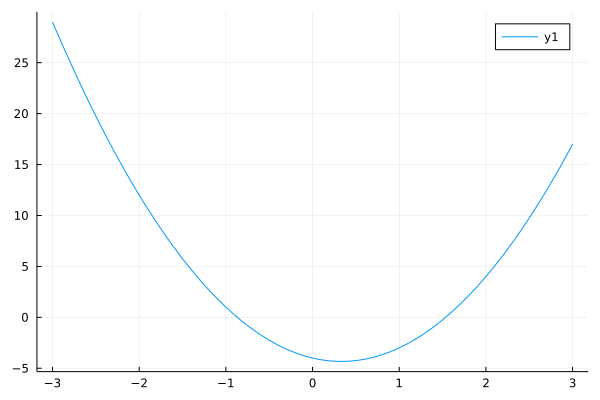

In [4]:
using MTH229
using Plots

f(x) = 3*x^2 - 2*x - 4
plot(f, -3, 3)          

#### x−e^−x2=0

In [5]:
using DataFrames

tol = 10.0^(-5)
err = 10.0^5
x0 = -0.1

function f(x)
    x - exp(-1*(x^2))
end
function fp(x)
    2*x*exp(-1*(x^2)) + 1
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,fp=NaN,err=NaN)

while err>tol
    x = x0 - f(x0)/fp(x0)
    err = abs(x-x0)
    if k==0
        resual = DataFrame(k=k,x=x0,f=f(x0),fp=fp(x0),err=err)
    else
        push!(resual, ([k,x0,f(x0),fp(x0),err]))
    end
    x0 = x
    k = k + 1
end
resual

,k,x,f,fp,err
,Int64,Float64,Float64,Float64,Float64
1,0,-0.1,-1.09005,0.80199,1.35918
2,1,1.25918,1.05434,1.51586,0.695544
3,2,0.563638,-0.164193,1.82047,0.0901927
4,3,0.65383,0.00168908,1.85278,0.000911645
5,4,0.652919,7.90573e-8,1.85261,4.26736e-8


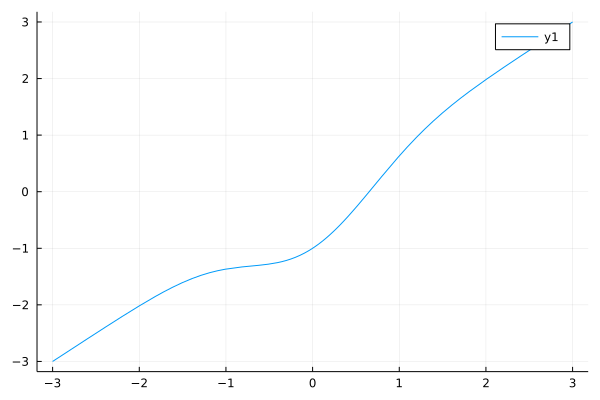

In [6]:
using MTH229
using Plots

f(x) = x - exp(-1*(x^2))
plot(f, -3, 3) 

In [7]:
fp(x) = 2*x*exp(-1*(x^2)) + 1
x = 0               # starting value, x_0
x = x - f(x)/fp(x)      # new value, x_1
x, f(x), fp(x)

(1.0, 0.6321205588285577, 1.7357588823428847)

#### ex−x4=0

In [8]:
using DataFrames

tol = 10.0^(-5)
err = 10.0^5
x0 = -0.1

function f(x)
    exp(x) - x^4
end
function fp(x)
    exp(x) - 4*x^3
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,fp=NaN,err=NaN)

while err>tol
    x = x0 - f(x0)/fp(x0)
    err = abs(x-x0)
    if k==0
        resual = DataFrame(k=k,x=x0,f=f(x0),fp=fp(x0),err=err)
    else
        push!(resual, ([k,x0,f(x0),fp(x0),err]))
    end
    x0 = x
    k = k + 1
end
resual

,k,x,f,fp,err
,Int64,Float64,Float64,Float64,Float64
1,0,-0.1,0.904737,0.908837,0.995489
2,1,-1.09549,-1.10585,5.59314,0.197716
3,2,-0.897773,-0.242153,3.30188,0.073338
4,3,-0.824435,-0.0234995,2.67993,0.00876868
5,4,-0.815666,-0.000294444,2.61303,0.000112683
6,5,-0.815553,-4.78733e-8,2.61218,1.83269e-8


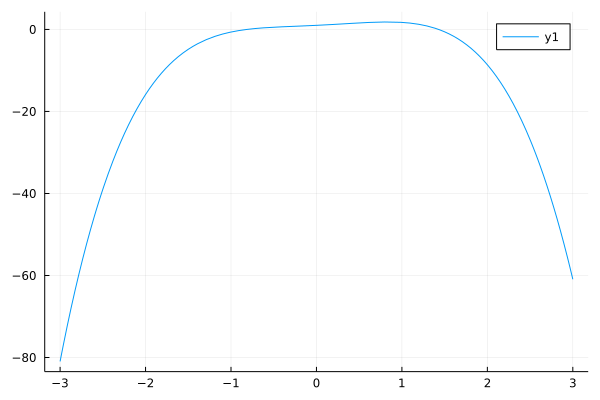

In [9]:
using MTH229
using Plots

f(x) = exp(x) - x^4
plot(f, -3, 3) 

#### Find the internal rate of return for these project using the bisection method

In [10]:
# create bisection method function

function bisec(f::Function,a::Float64,b::Float64,tol::Float64)
    if a>=b
        error("a must be less than b") 
    end
    if f(a)*f(b) > 0
        error("signs of f(a) and f(b) are not opposites") 
    end
    i = 1
    err=b-a
    c=(a+b)/2
    resual = DataFrame(a=a,b=b,c=c,err=err)
    while err>tol
        if f(c)==0.0
            break
        end
        if f(a)*f(c)<0
            a=a
            b=c
        else
            a=c
            b=b
        end
        c=(a+b)/2
        err=b-a
        i = i + 1
        push!(resual, ([a,b,c,err]))
    end
    return c, resual
end

bisec (generic function with 1 method)

#### Project A

In [11]:
using NPFinancial

irr([-1000, 60, 60, 60, 60, 1060])

0.05999999999999961

In [12]:
using Roots

tvmnpv(i,cfo,cfall)=begin
         n=collect(1:length(cfall));
         cfo + sum(cfall./(1+i).^n)
end

f(x)=tvmnpv(x, cfo, cfall)

cfo=-1000.0
cfall=[60, 60, 60, 60, 1060];

fzero(f, [0.0, 1.0])

0.05999999999999994

In [13]:
# Project A

using DataFrames

function ff(x)
    60/(1+x[1]) + 60/(1+x[1])^2 + 60/(1+x[1])^3 + 60/(1+x[1])^4 + 1060/(1+x[1])^5 - 1000
end

c, resual = bisec(ff, -0.1, 0.1, 1e-6);

println("Iterations\n",resual,"\n")
println("Bisection result: ", c)

Iterations
19×4 DataFrame
 Row │ a           b          c          err         
     │ Float64     Float64    Float64    Float64     
─────┼───────────────────────────────────────────────
   1 │ -0.1        0.1        0.0        0.2
   2 │  0.0        0.1        0.05       0.1
   3 │  0.05       0.1        0.075      0.05
   4 │  0.05       0.075      0.0625     0.025
   5 │  0.05       0.0625     0.05625    0.0125
   6 │  0.05625    0.0625     0.059375   0.00625
   7 │  0.059375   0.0625     0.0609375  0.003125
   8 │  0.059375   0.0609375  0.0601562  0.0015625
   9 │  0.059375   0.0601562  0.0597656  0.00078125
  10 │  0.0597656  0.0601562  0.0599609  0.000390625
  11 │  0.0599609  0.0601562  0.0600586  0.000195313
  12 │  0.0599609  0.0600586  0.0600098  9.76563e-5
  13 │  0.0599609  0.0600098  0.0599854  4.88281e-5
  14 │  0.0599854  0.0600098  0.0599976  2.44141e-5
  15 │  0.0599976  0.0600098  0.0600037  1.2207e-5
  16 │  0.0599976  0.0600037  0.0600006  6.10352e-6
  17 │  0.0599

#### Project B

In [14]:
using NPFinancial

irr([-990, 60, 60, 60, 60, 1060])

0.06238941593991987

In [15]:
using Roots

tvmnpv(i,cfo,cfall)=begin
         n=collect(1:length(cfall));
         cfo + sum(cfall./(1+i).^n)
end

f(x)=tvmnpv(x, cfo, cfall)

cfo=-990.0
cfall=[60, 60, 60, 60, 1060];

fzero(f, [0.0, 1.0])

0.062389415939919986

In [16]:
# Project B
using DataFrames

function ff(x)
    60/(1+x[1]) + 60/(1+x[1])^2 + 60/(1+x[1])^3 + 60/(1+x[1])^4 + 1060/(1+x[1])^5 - 990
end

c, resual = bisec(ff, -0.1, 0.1, 1e-6);

println("Iterations\n",resual,"\n")
println("Bisection result: ", c)

Iterations
19×4 DataFrame
 Row │ a           b          c          err         
     │ Float64     Float64    Float64    Float64     
─────┼───────────────────────────────────────────────
   1 │ -0.1        0.1        0.0        0.2
   2 │  0.0        0.1        0.05       0.1
   3 │  0.05       0.1        0.075      0.05
   4 │  0.05       0.075      0.0625     0.025
   5 │  0.05       0.0625     0.05625    0.0125
   6 │  0.05625    0.0625     0.059375   0.00625
   7 │  0.059375   0.0625     0.0609375  0.003125
   8 │  0.0609375  0.0625     0.0617188  0.0015625
   9 │  0.0617188  0.0625     0.0621094  0.00078125
  10 │  0.0621094  0.0625     0.0623047  0.000390625
  11 │  0.0623047  0.0625     0.0624023  0.000195313
  12 │  0.0623047  0.0624023  0.0623535  9.76563e-5
  13 │  0.0623535  0.0624023  0.0623779  4.88281e-5
  14 │  0.0623779  0.0624023  0.0623901  2.44141e-5
  15 │  0.0623779  0.0623901  0.062384   1.2207e-5
  16 │  0.062384   0.0623901  0.0623871  6.10352e-6
  17 │  0.0623

#### Project C 

In [17]:
using NPFinancial

irr([-1020, 60, 60, 60, 60, 1060])

0.055312457572278984

In [18]:
using Roots

tvmnpv(i,cfo,cfall)=begin
         n=collect(1:length(cfall));
         cfo + sum(cfall./(1+i).^n)
end

f(x)=tvmnpv(x, cfo, cfall)

cfo=-990.0
cfall=[60, 60, 60, 60, 1020];

fzero(f, [0.0, 1.0])

0.05517840581618627

In [19]:
# Project C
using DataFrames

function ff(x)
    60/(1+x[1]) + 60/(1+x[1])^2 + 60/(1+x[1])^3 + 60/(1+x[1])^4 + 1060/(1+x[1])^5 - 1020
end

c, resual = bisec(ff, -0.1, 0.1, 1e-6);

println("Iterations\n",resual,"\n")
println("Bisection result: ", c)

Iterations
19×4 DataFrame
 Row │ a           b          c          err         
     │ Float64     Float64    Float64    Float64     
─────┼───────────────────────────────────────────────
   1 │ -0.1        0.1        0.0        0.2
   2 │  0.0        0.1        0.05       0.1
   3 │  0.05       0.1        0.075      0.05
   4 │  0.05       0.075      0.0625     0.025
   5 │  0.05       0.0625     0.05625    0.0125
   6 │  0.05       0.05625    0.053125   0.00625
   7 │  0.053125   0.05625    0.0546875  0.003125
   8 │  0.0546875  0.05625    0.0554687  0.0015625
   9 │  0.0546875  0.0554687  0.0550781  0.00078125
  10 │  0.0550781  0.0554687  0.0552734  0.000390625
  11 │  0.0552734  0.0554687  0.0553711  0.000195313
  12 │  0.0552734  0.0553711  0.0553223  9.76563e-5
  13 │  0.0552734  0.0553223  0.0552979  4.88281e-5
  14 │  0.0552979  0.0553223  0.0553101  2.44141e-5
  15 │  0.0553101  0.0553223  0.0553162  1.2207e-5
  16 │  0.0553101  0.0553162  0.0553131  6.10352e-6
  17 │  0.0553